In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(units = 72, activation = 'relu', input_shape = (72, 6)))
modelLSTM.add(Dropout(0.5))
modelLSTM.add(Dense(units = 72))

In [ ]:
#create callback
filepath = 'my_best_modelLSTM_yourself.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(
    monitor='loss', 
    patience=3, 
    min_delta=0, 
    mode='auto'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)

callbacks = [earlystopping, reduce_lr]

optimizer = Adam(learning_rate=0.0005)

def train_model(X_train, y_train, epochs=1):
  modelLSTM.compile(optimizer=optimizer, loss = 'mean_squared_error')
  trained = modelLSTM.fit(X_train, y_train, epochs=epochs, batch_size=32, callbacks=callbacks)
  return trained

In [ ]:
def prep_data(df, scaler):
  df = df[['pm25','temp','rh','pm10', 'lat','long']]
  arr = scaler.transform(df)
  inputs = []
  outputs = []
  validates = []
  for i in range(len(arr)//216):
    iov = arr[i*216:i*216+216]
    input = iov[:72]
    output = iov[72:144]
    validate = iov[144:]
    inputs.append(input)
    outputs.append(output)
    validates.append(validate)
  return np.array(inputs), np.array(outputs), np.array(validates)

In [ ]:
df = pd.DataFrame()
for i in range(10):
  temp = pd.read_csv(f'dataset2_{i}.csv')
  temp = temp[['pm25','temp','rh','pm10', 'lat','long']]
  df = pd.concat([df, temp])
scaler = MinMaxScaler()
scaler.fit(df)
import joblib
joblib.dump(scaler, 'scaler.gz')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['scaler.gz']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 10s 34ms/step - loss: 0.0161 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0095 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 32ms/step - loss: 0.0069 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 32ms/step - loss: 0.0055 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 31ms/step - loss: 0.0046 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0041 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0036 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0034 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 32ms/step - loss: 0.0032 - lr: 5.0000e-04


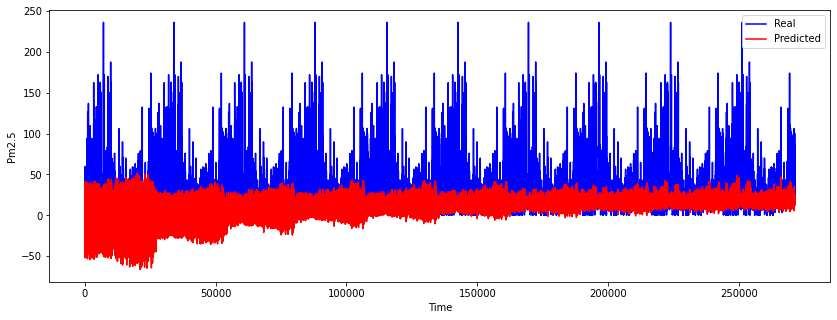

RMSE :  9.593953698443075


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0029 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0027 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0026 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0024 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0025 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0022 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0021 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 32ms/step - loss: 0.0022 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0021 - lr: 5.0000e-04


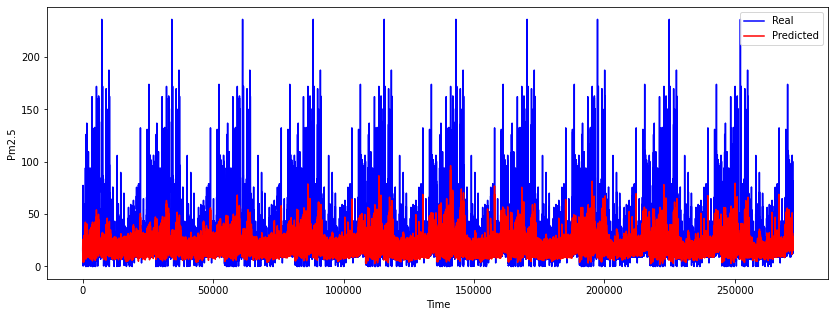

RMSE :  6.76689685149845


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0021 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0021 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0019 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0020 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 33ms/step - loss: 0.0017 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0017 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0018 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0017 - lr: 5.0000e-04


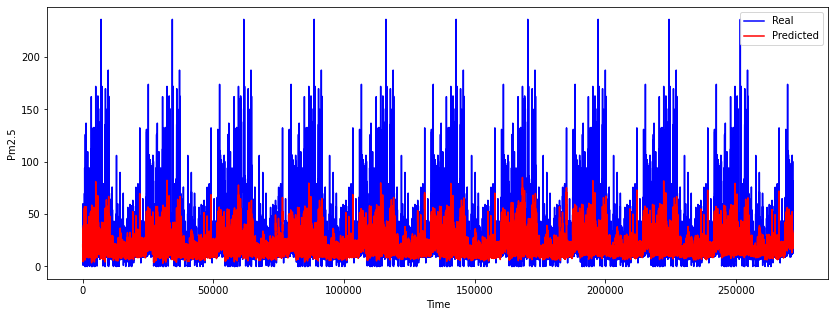

RMSE :  5.883317521469524


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0017 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0017 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 34ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0017 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 37ms/step - loss: 0.0016 - lr: 5.0000e-04


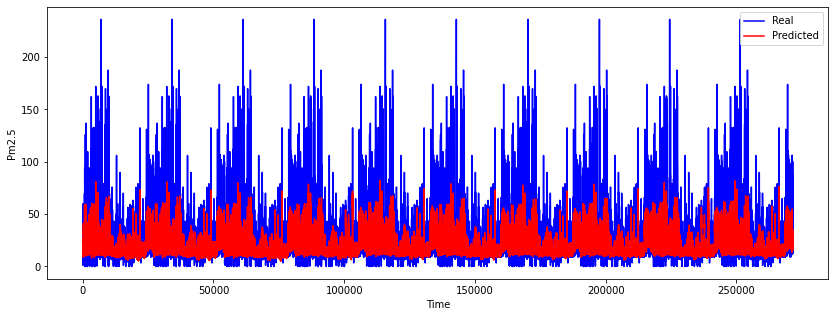

RMSE :  5.592200824379307


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 35ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 36ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 2s 39ms/step - loss: 0.0015 - lr: 5.0000e-04


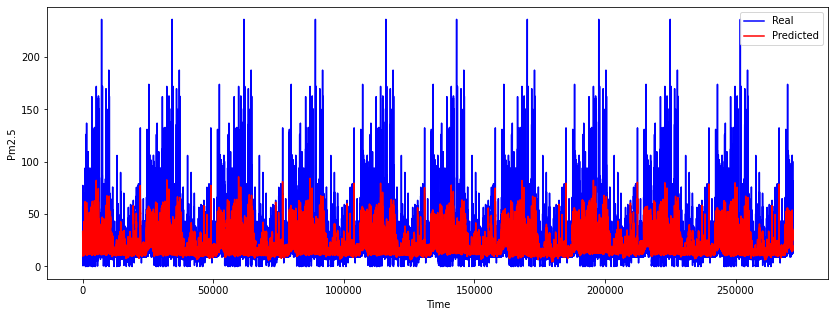

RMSE :  5.5246656309736135


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 37ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 37ms/step - loss: 0.0016 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 37ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0015 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0014 - lr: 5.0000e-04


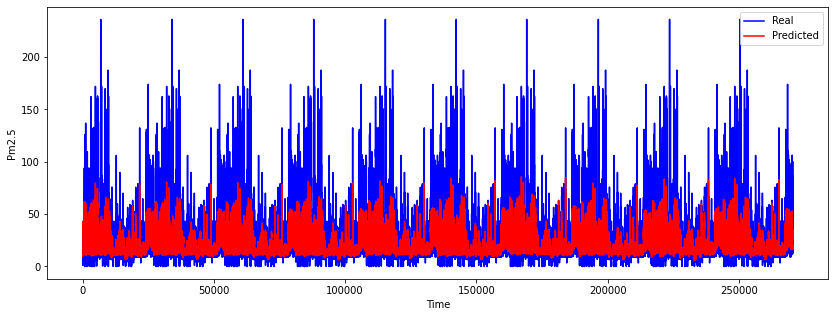

RMSE :  5.46768252933587


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 2s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


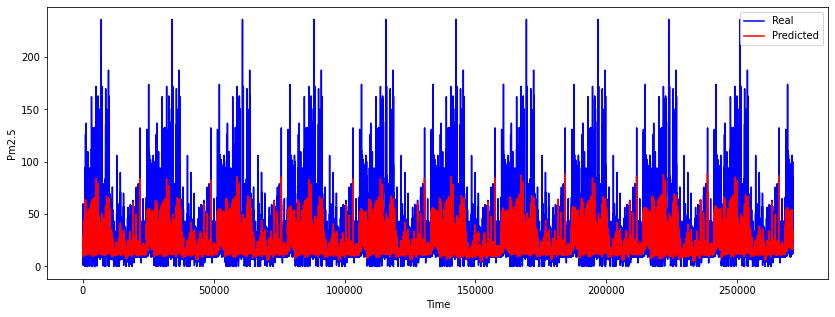

RMSE :  5.423233078052215


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


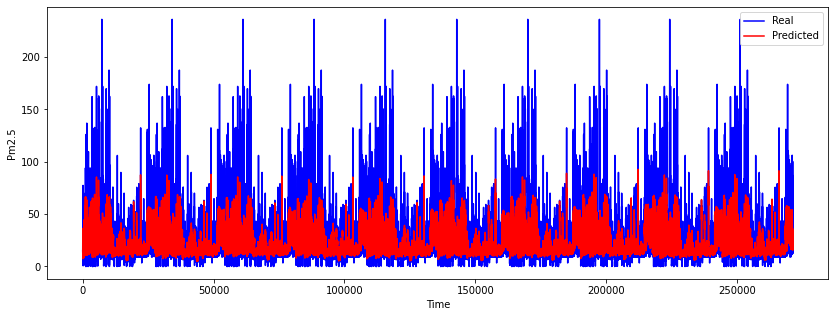

RMSE :  5.4004304665506515
12/12 [==============================] - 1s 39ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0014 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 2s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


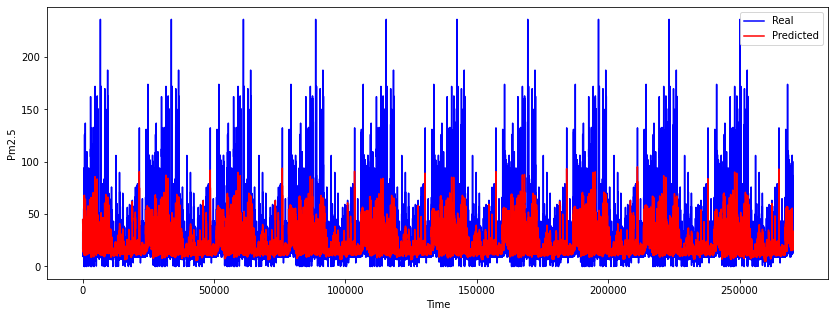

RMSE :  5.391427422352544


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


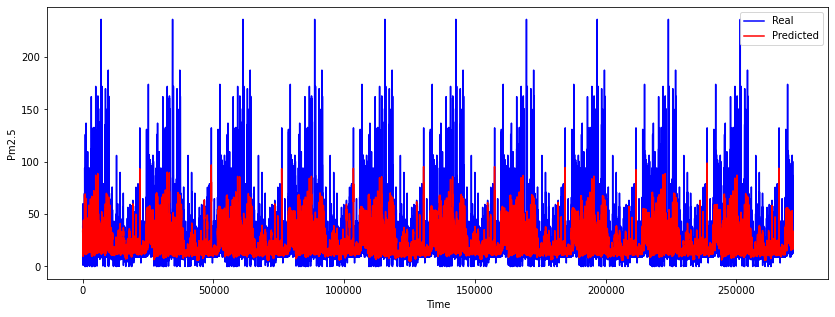

RMSE :  5.405210305699771


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


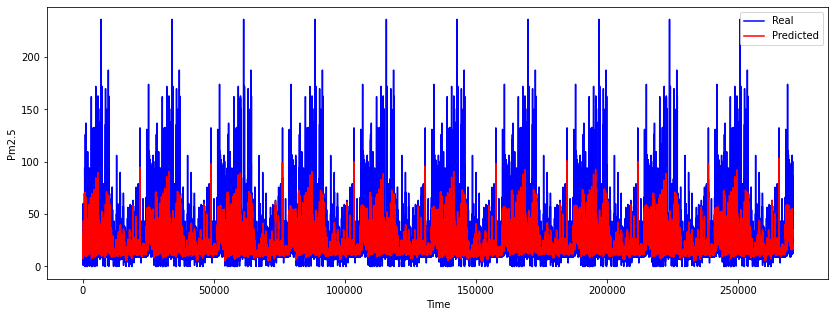

RMSE :  5.3784663613160815


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 52ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 49ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 3s 43ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


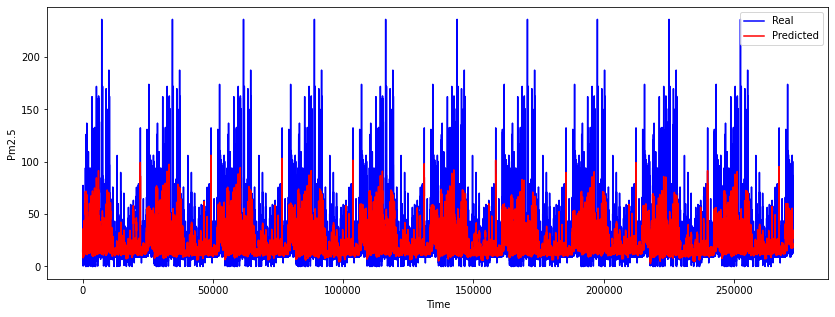

RMSE :  5.389362911645673
12/12 [==============================] - 1s 43ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


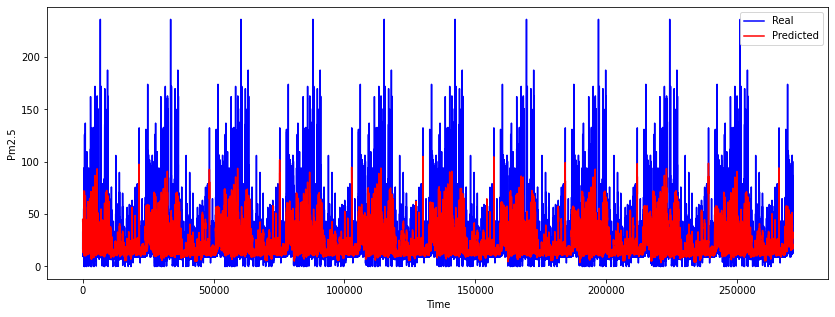

RMSE :  5.395009491411523


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


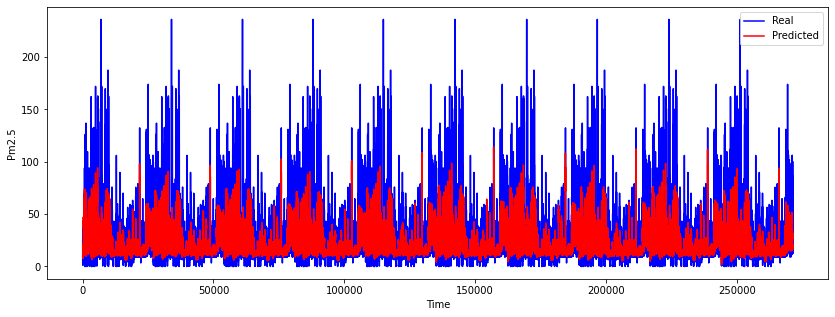

RMSE :  5.396390020298348


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0013 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


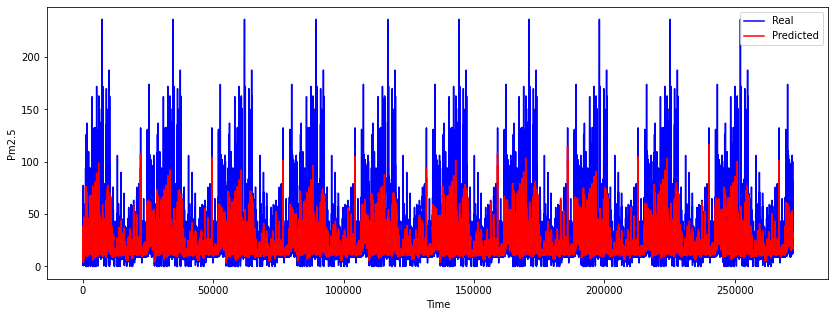

RMSE :  5.415266938636211


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


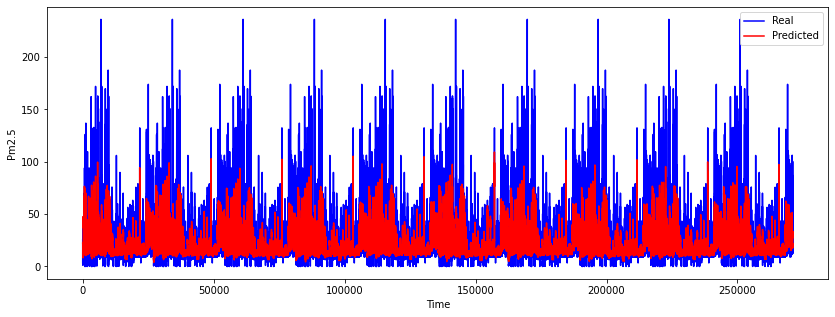

RMSE :  5.392531536224068


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


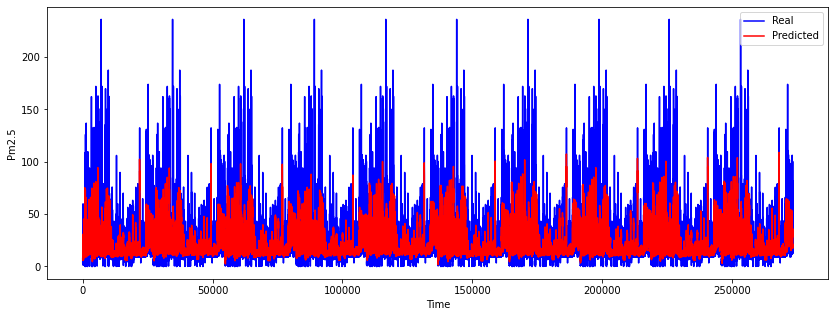

RMSE :  5.39460195455005


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 2s 54ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


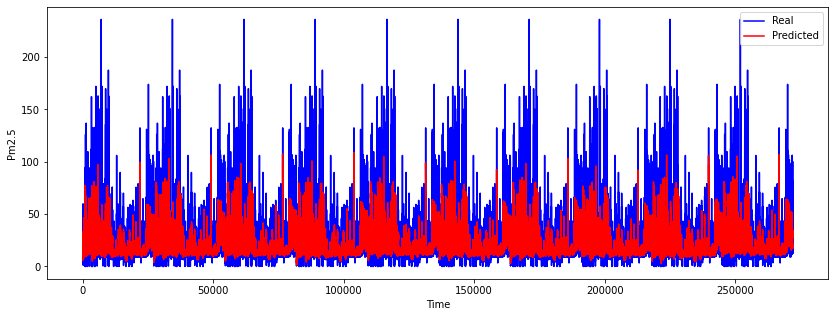

RMSE :  5.384493974503542


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 3s 46ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


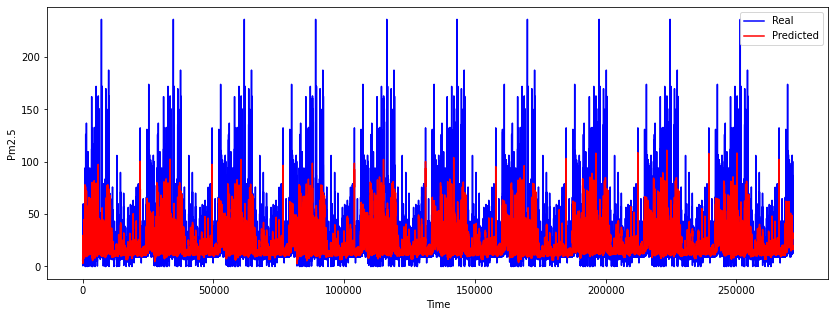

RMSE :  5.38549000520713


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


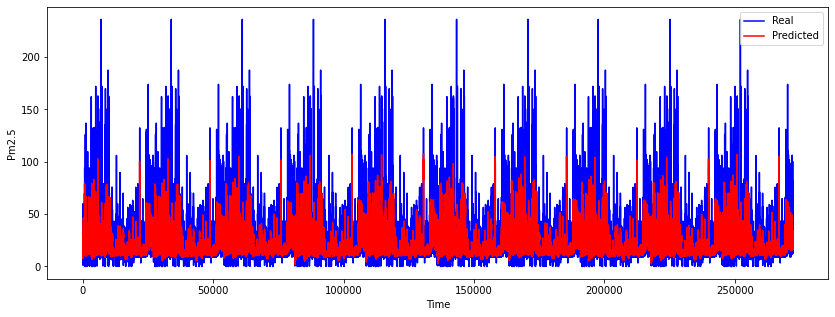

RMSE :  5.399073276301719


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


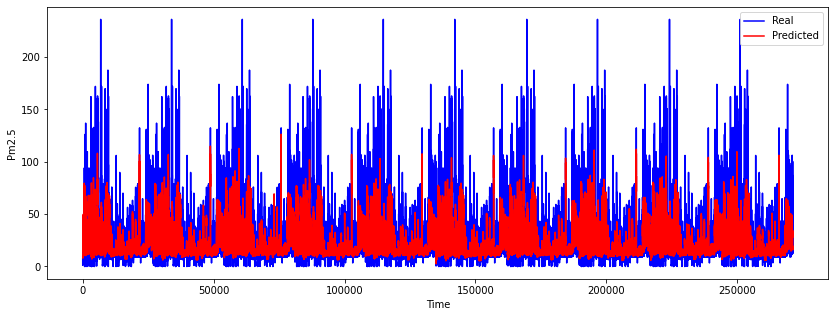

RMSE :  5.420171030677284


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


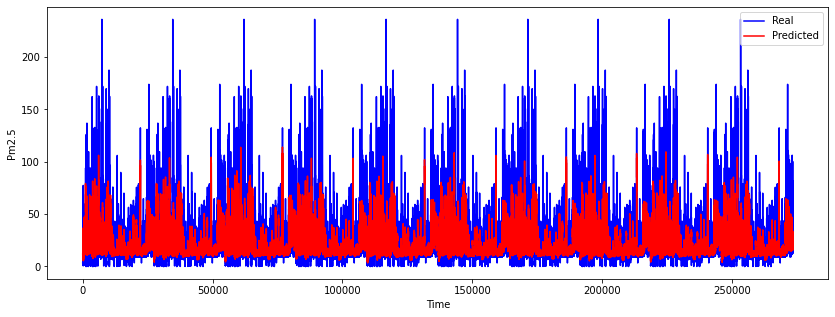

RMSE :  5.396408543605108


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.8931e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


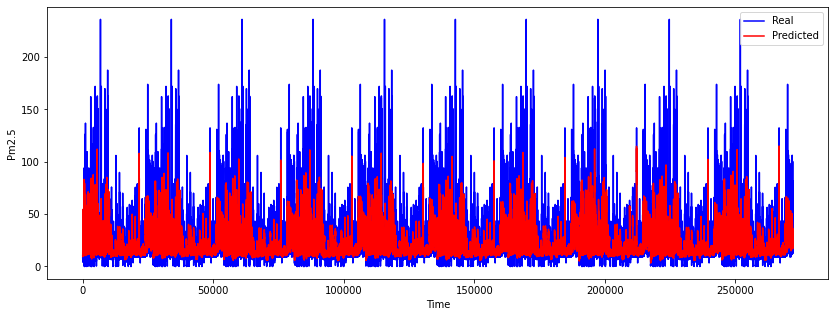

RMSE :  5.40453145135069


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


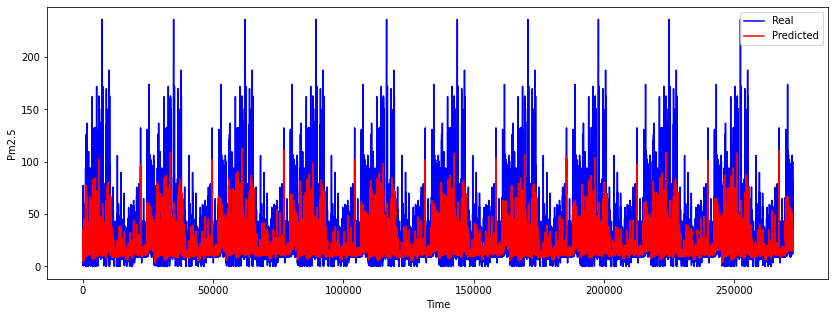

RMSE :  5.401106587086956
12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


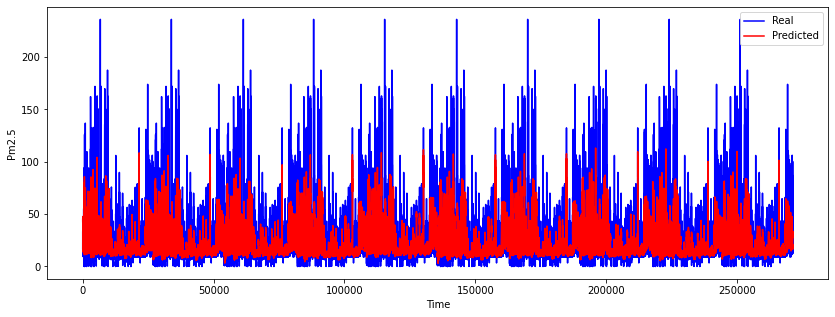

RMSE :  5.379363089729036


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7129e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


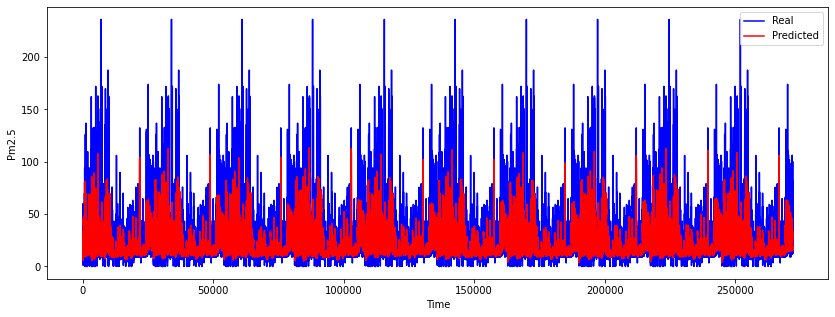

RMSE :  5.3782663670465425
12/12 [==============================] - 1s 39ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5589e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


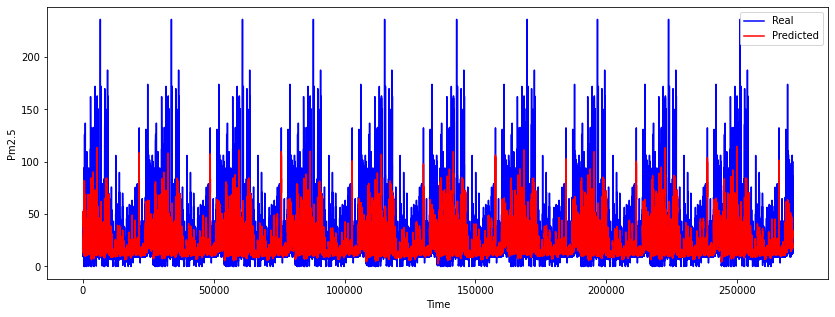

RMSE :  5.383710418070783


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.9836e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.7409e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 46ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


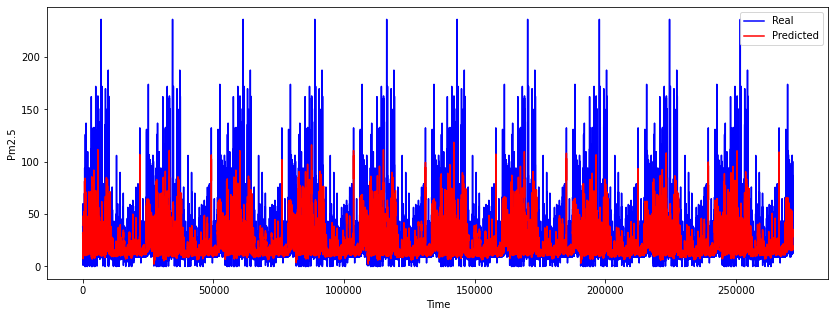

RMSE :  5.375494570517147


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.9235e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.9822e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


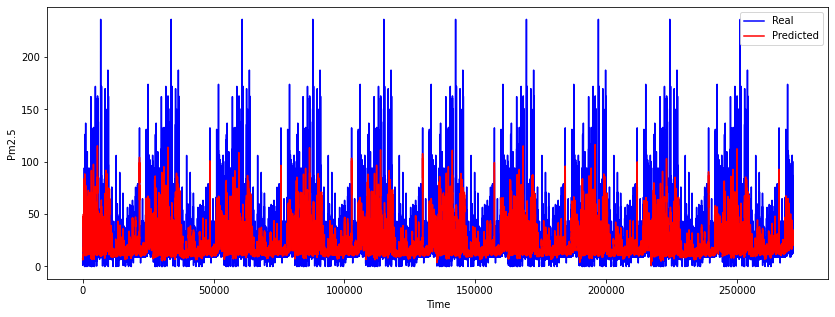

RMSE :  5.378397138062585


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.5436e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


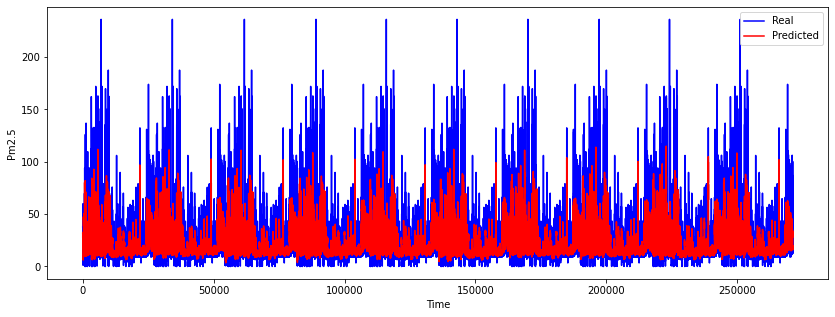

RMSE :  5.3520280708439385


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.5771e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 9.9451e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.8468e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.9261e-04 - lr: 5.0000e-04


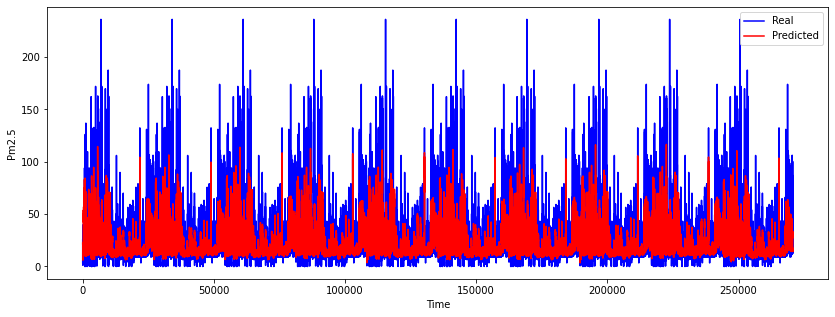

RMSE :  5.379211972578978


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5001e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


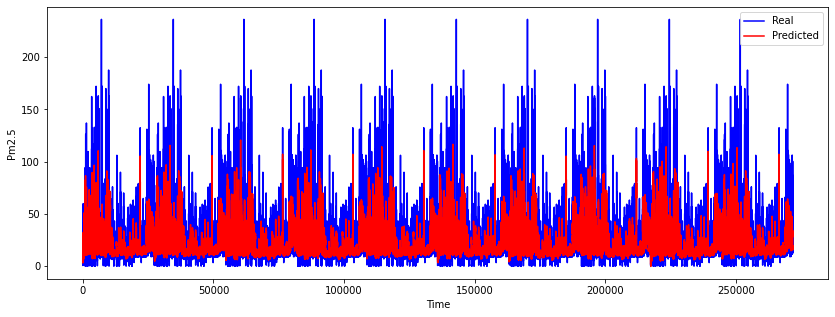

RMSE :  5.393871007633884


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.6103e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3753e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.9807e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.3878e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 9.5881e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.9069e-04 - lr: 5.0000e-04


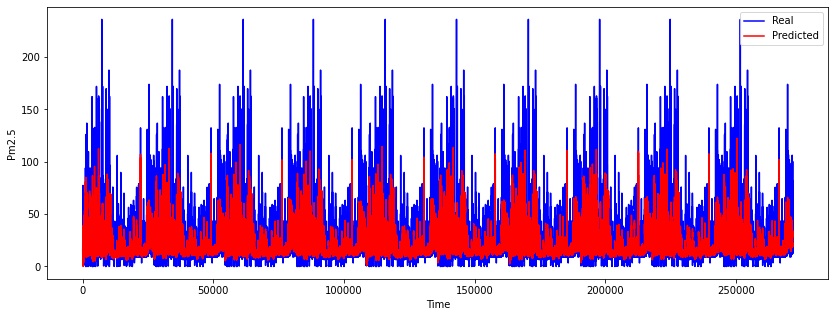

RMSE :  5.374706298248398


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 9.9293e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7145e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.5986e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.2094e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.9504e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6690e-04 - lr: 5.0000e-04


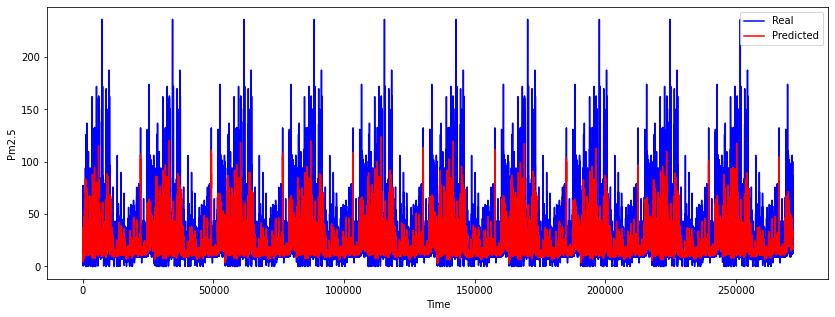

RMSE :  5.406726601952387


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 9.8980e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.3368e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.4847e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5206e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.8666e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.7751e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.5010e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5140e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.2505e-04 - lr: 5.0000e-04


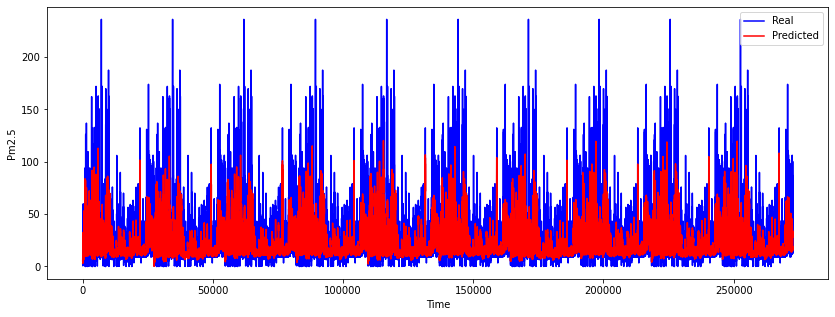

RMSE :  5.386742562663008


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6137e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.9103e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4207e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.4983e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3642e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4846e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.7007e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.8947e-04 - lr: 5.0000e-04


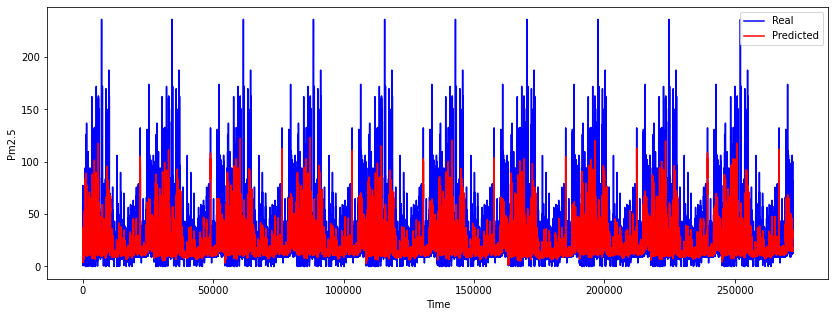

RMSE :  5.430503607037701


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.5542e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.5919e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.3497e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0011 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 45ms/step - loss: 9.7003e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4184e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6191e-04 - lr: 5.0000e-04


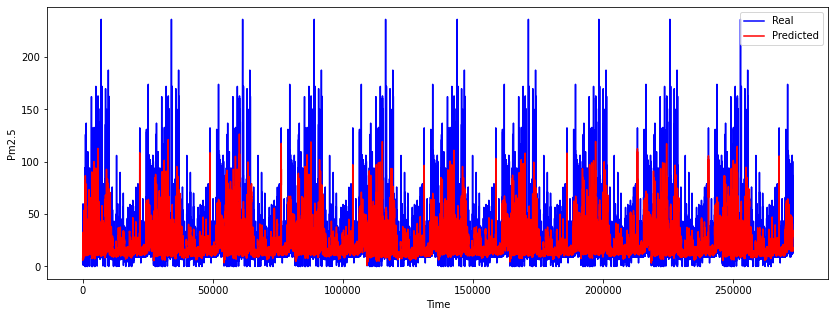

RMSE :  5.390237126798176


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 43ms/step - loss: 9.7293e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.3791e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6669e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.6621e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6077e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.5853e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.9010e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3918e-04 - lr: 5.0000e-04


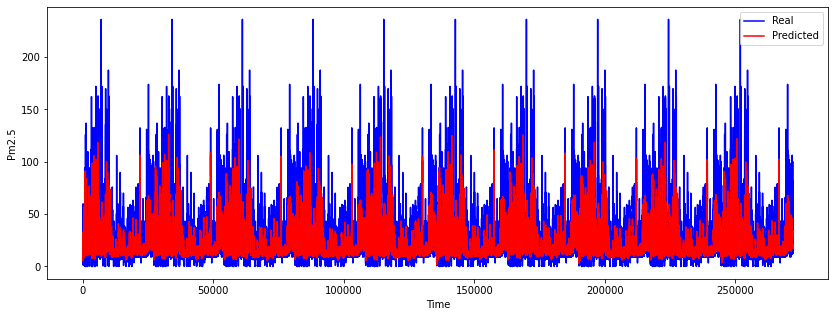

RMSE :  5.386055185456771


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.9724e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.2798e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6451e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0968e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.8385e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6747e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.2106e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.5734e-04 - lr: 5.0000e-04


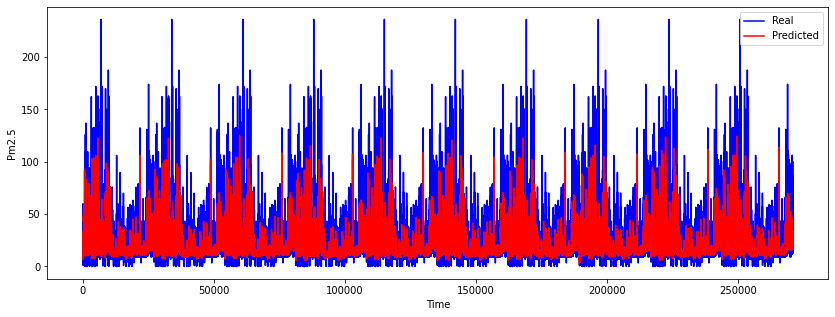

RMSE :  5.38165073637553


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4116e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.7186e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.9068e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 9.7236e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7474e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.4063e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.1096e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5215e-04 - lr: 5.0000e-04


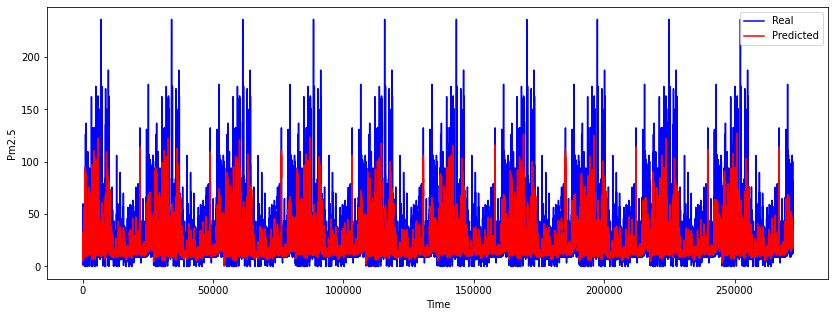

RMSE :  5.387405583400048


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3941e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.8874e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.5901e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.6646e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3948e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.1847e-04 - lr: 5.0000e-04


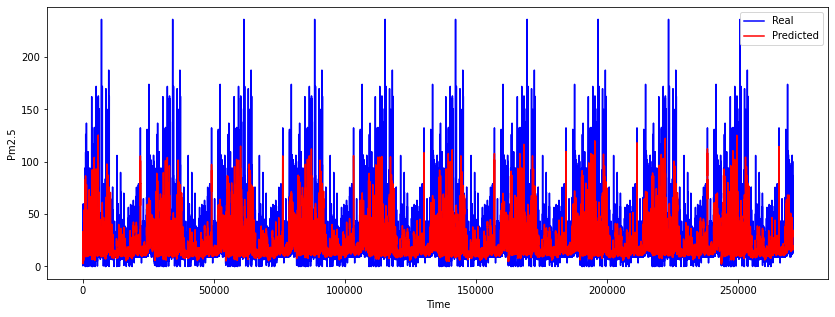

RMSE :  5.4220619356001025


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3214e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.8074e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 4s 46ms/step - loss: 9.3916e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 9.1394e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5651e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 44ms/step - loss: 9.4247e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.6839e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.2988e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.4539e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.3468e-04 - lr: 5.0000e-04


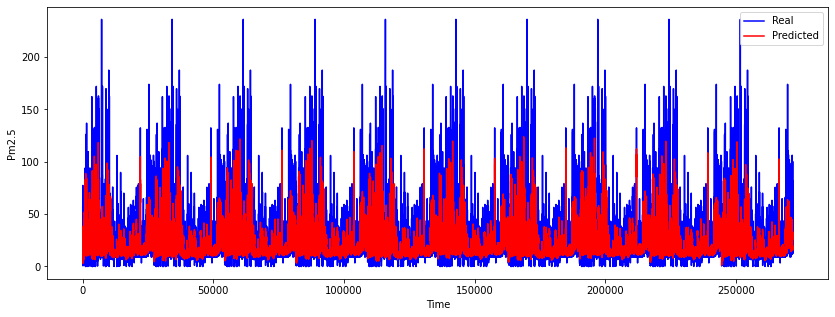

RMSE :  5.391615766030823


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3029e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6728e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.2014e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 8.9126e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5960e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.8803e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.7701e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 8.9096e-04 - lr: 5.0000e-04


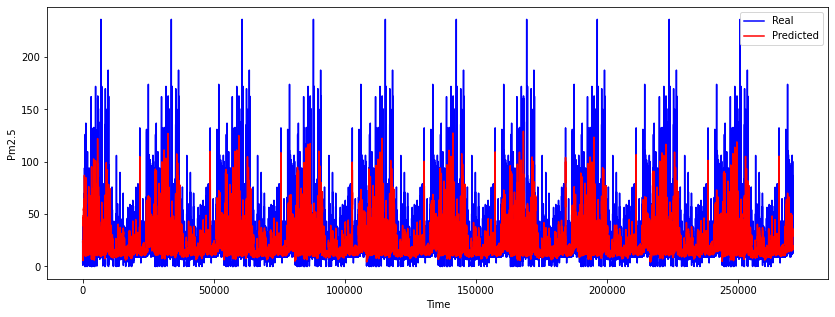

RMSE :  5.39713079068192


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.4261e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.2614e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.0412e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6213e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3401e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.6471e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7964e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.8139e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4448e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.2696e-04 - lr: 5.0000e-04


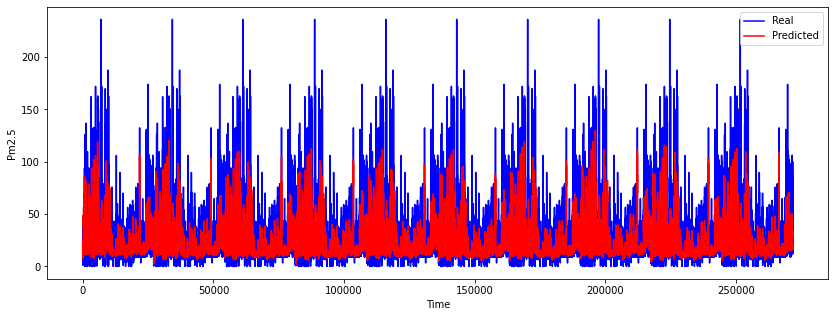

RMSE :  5.386495273950655


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3303e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.2304e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7753e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0375e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.1376e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0856e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.9467e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 0.0010 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 38ms/step - loss: 8.9832e-04 - lr: 5.0000e-04


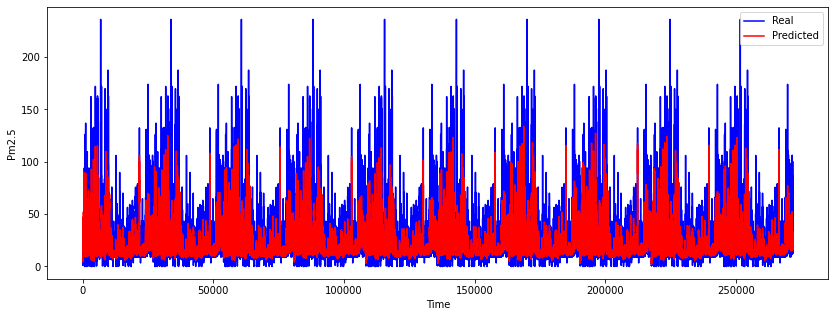

RMSE :  5.386488210932487


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3965e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7188e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 8.8163e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.2358e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.7959e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.9591e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.7831e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.1991e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.2155e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.7140e-04 - lr: 5.0000e-04


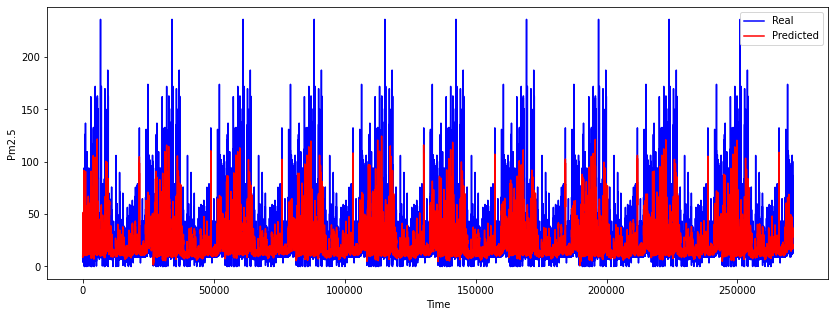

RMSE :  5.374938521129932


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.2764e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.3107e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0324e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 8.8047e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3199e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6852e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.1458e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0457e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.3500e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.5879e-04 - lr: 5.0000e-04


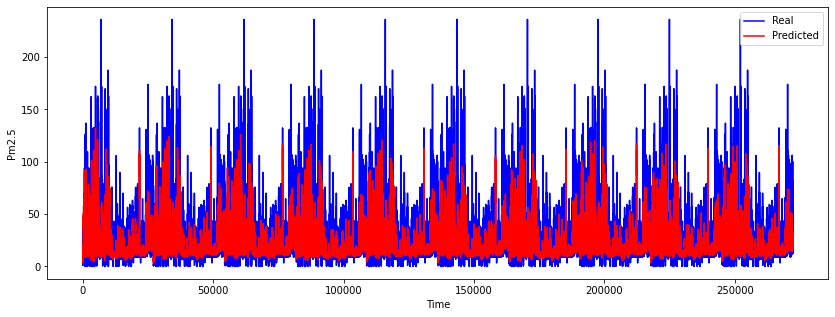

RMSE :  5.432960885610363
12/12 [==============================] - 1s 41ms/step - loss: 9.3664e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 9.8489e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 8.4833e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 8.6558e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.0032e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.7548e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.1272e-04 - lr: 5.0000e-04


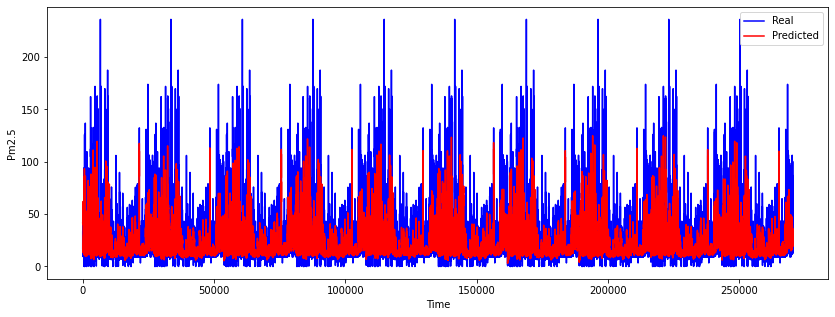

RMSE :  5.405419454794985


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 8.5065e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.7425e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 8.9835e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.4856e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.1177e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.6919e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.6348e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 8.6087e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.5240e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 42ms/step - loss: 8.4652e-04 - lr: 5.0000e-04


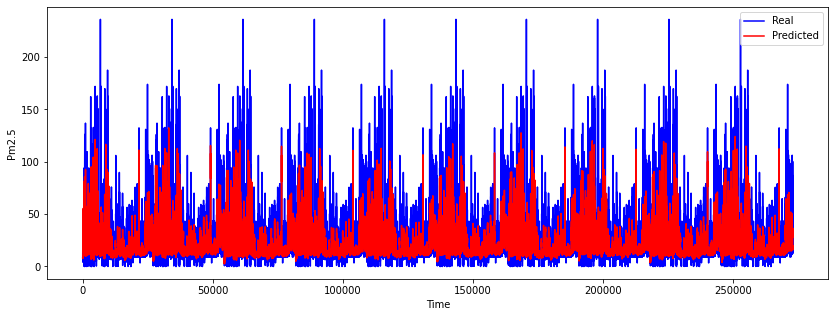

RMSE :  5.3894170583711345


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.2345e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.8190e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 39ms/step - loss: 9.2050e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.3449e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.6667e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.8353e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.7009e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 41ms/step - loss: 9.2221e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 9.0338e-04 - lr: 5.0000e-04


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


12/12 [==============================] - 1s 40ms/step - loss: 8.8457e-04 - lr: 5.0000e-04


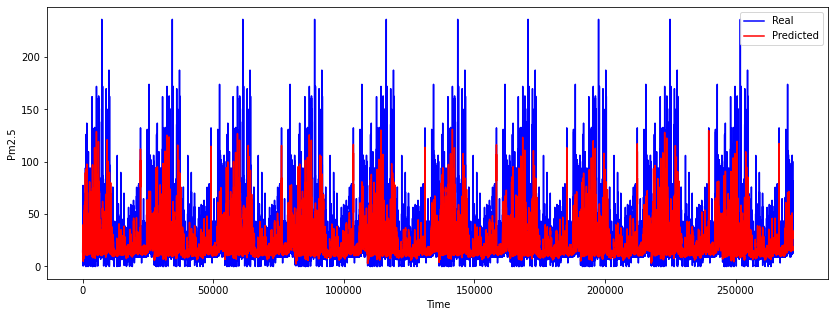

RMSE :  5.398731560946292


In [ ]:
epochs = 50
min_rmse = 1e6
for i in range(epochs):
  np.random.seed(27 + i)
  selector = np.random.choice(np.arange(10), replace=True, size=10)
  acc_mse = 0
  yp_list = []
  yt_list = []
  for pidx in selector:
    df = pd.read_csv(f'dataset2_{pidx}.csv')
    df = df[['pm25','temp','rh','pm10', 'lat','long']]
    
    inputs, outputs, validates = prep_data(df, scaler)
    train_model(inputs, outputs[:, :, 0], epochs=1)
    y_pred = modelLSTM.predict(outputs)
    scale = 1/scaler.scale_[0]
    y_pred = y_pred*scale
    y_test = validates[:, :, 0]*scale
    mse = mean_squared_error(y_test, y_pred)
    acc_mse += mse
    yp_list += y_pred.tolist()
    yt_list += y_test.tolist()
  plt.figure(figsize=(14,5))
  plt.plot(np.array(yt_list).reshape(-1), color = 'blue', label = 'Real')
  plt.plot(np.array(yp_list).reshape(-1), color = 'red', label = 'Predicted')
  plt.xlabel('Time')
  plt.ylabel('Pm2.5')
  plt.legend()
  plt.show()
  rmse = math.sqrt(acc_mse/epochs)
  print('RMSE : ', rmse)
  if rmse < min_rmse:
    modelLSTM.save('best_weight.h5')